In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore 
import datetime as dt

# Load the dataset
df = pd.read_csv('benin-malanville.csv')

# Check the first few rows
print(df.head())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [16]:
# Summary statistics for all numeric columns
summary_stats = df.describe().T
print(summary_stats)


                  count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8   55.1   80.1   
WS             525600.0    2.121113    1.603466    0.0    1.0    1.9    3.1   
WSgust         525600.0    2.809195    2.029120    0.0    1.3    2.6    4.1   
WSstdev        525600.0    0.473390    0.273395    0.0    0.4    0.5    0.6   
WD             525600.0  153.435172  102.332842    0.0   59.0  181.0  235.1   
WDstdev        525600.0    8.582407    6.385864    0

In [17]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Detect outliers using Z-score for GHI, DNI, DHI
z_scores = np.abs(zscore(df[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']]))
outliers = np.where(z_scores > 3)
print("Outliers detected at:\n", outliers)


Missing values:
 Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Outliers detected at:
 (array([   670,    671,    671, ..., 525143, 525151, 525155]), array([2, 0, 2, ..., 6, 5, 6]))


<Figure size 1400x800 with 0 Axes>

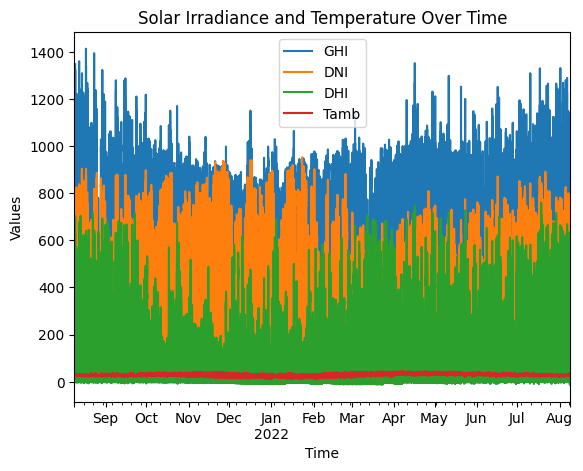

In [18]:
# Convert to datetime if necessary
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)



# Plot GHI, DNI, DHI over time
plt.figure(figsize=(14, 8))
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot()
plt.title('Solar Irradiance and Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


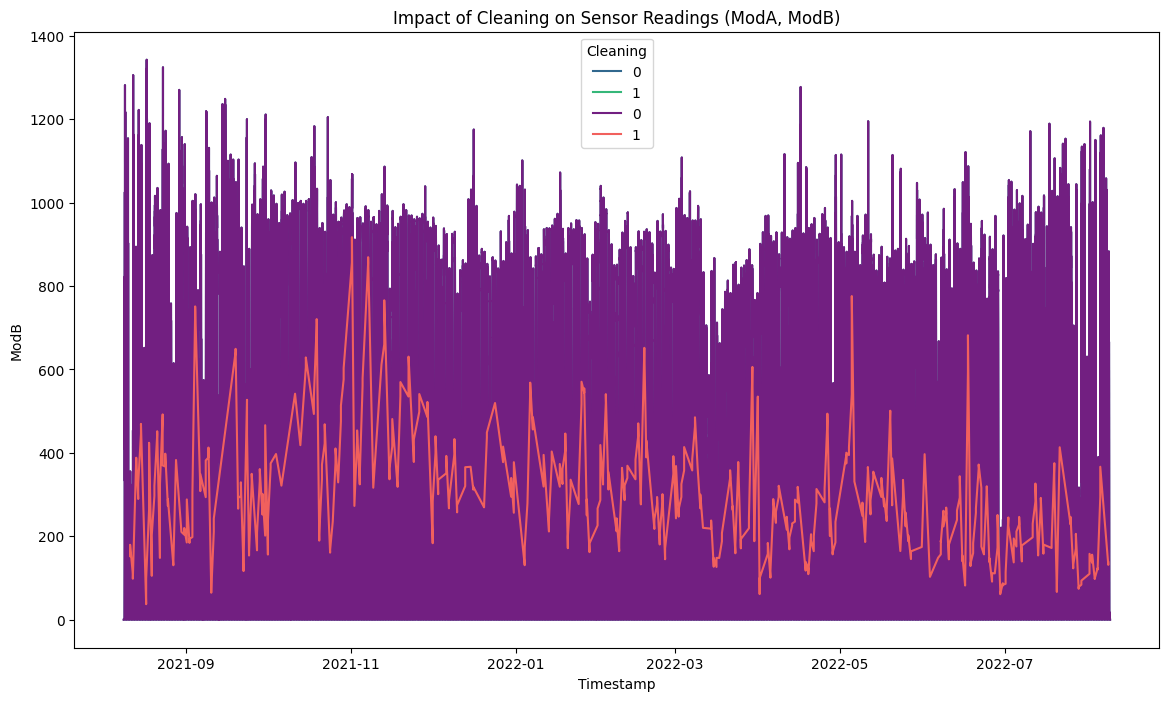

In [8]:
# Plot sensor readings before and after cleaning
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Timestamp', y='ModB', hue='Cleaning', palette='viridis')
sns.lineplot(data=df, x='Timestamp', y='ModB', hue='Cleaning', palette='magma')
plt.title('Impact of Cleaning on Sensor Readings (ModA, ModB)')
plt.show()


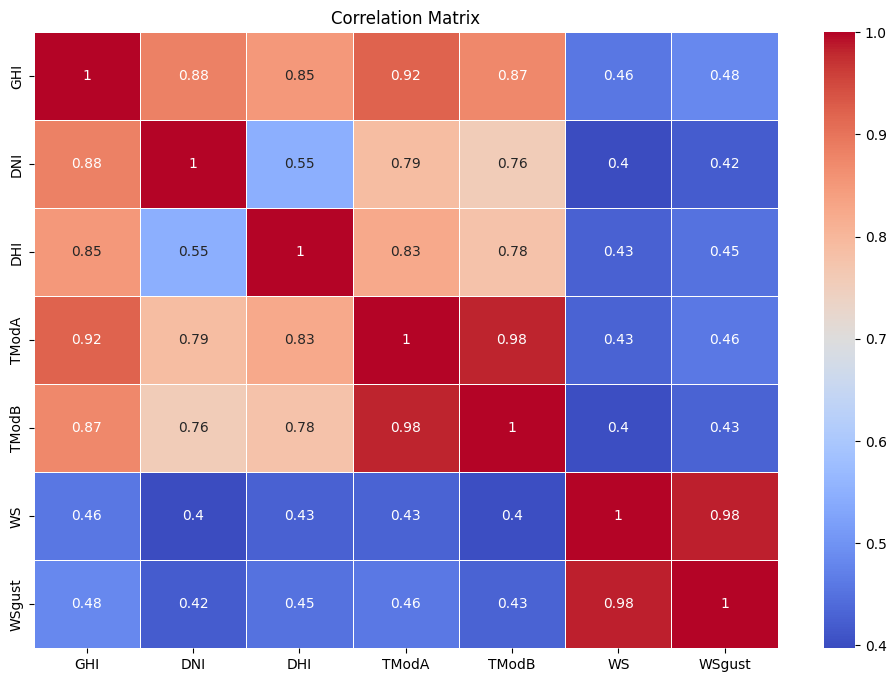

In [21]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


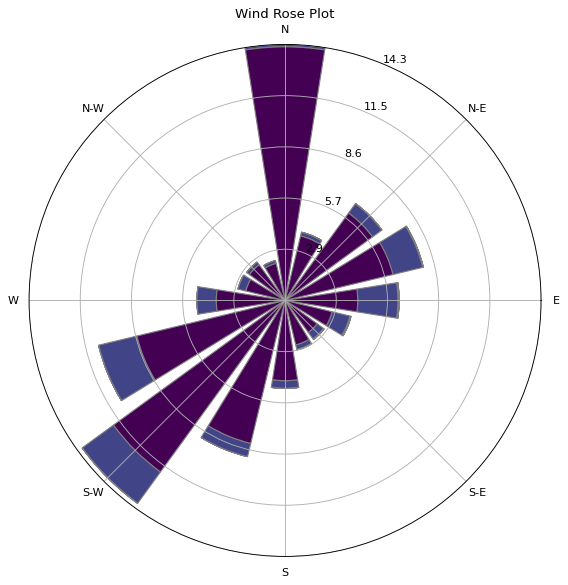

In [15]:
# Wind rose plot for WS and WD
import matplotlib.cm as cm
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='grey', cmap=cm.viridis)
ax.set_title('Wind Rose Plot')
plt.show()


C:\Users\Hello\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


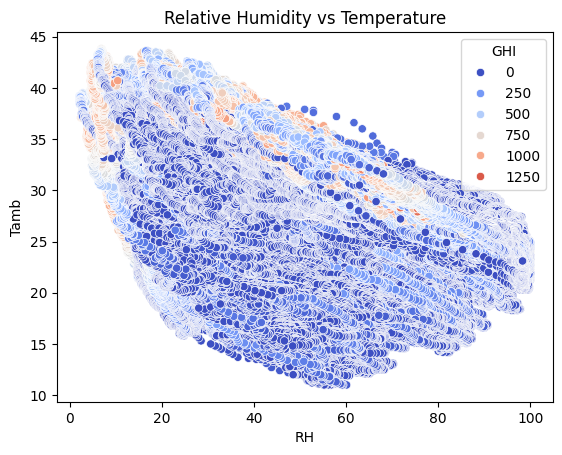

In [13]:
# Scatter plot to visualize RH vs Temperature
sns.scatterplot(data=df, x='RH', y='Tamb', hue='GHI', palette='coolwarm')
plt.title('Relative Humidity vs Temperature')
plt.show()


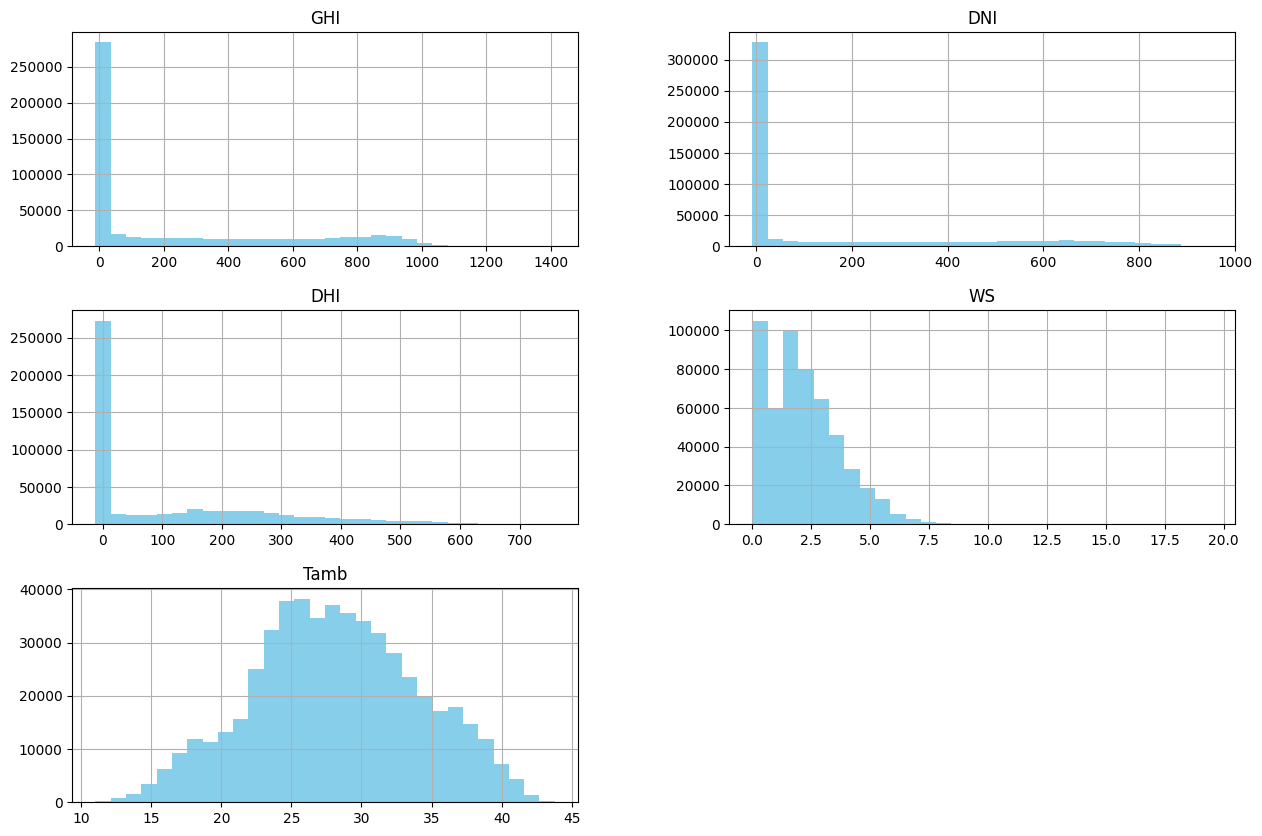

In [18]:
# Histograms for GHI, DNI, DHI, WS, and temperatures
df[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=30, figsize=(15, 10), color='skyblue')
plt.show()


In [19]:
# Calculate Z-scores
df['Z_GHI'] = zscore(df['GHI'])
df['Z_DNI'] = zscore(df['DNI'])
df['Z_DHI'] = zscore(df['DHI'])

# Flag significant outliers
outliers = df[(df['Z_GHI'].abs() > 3) | (df['Z_DNI'].abs() > 3) | (df['Z_DHI'].abs() > 3)]
print("Outliers based on Z-scores:\n", outliers)


Outliers based on Z-scores:
                Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670     2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671     2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672     2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673     2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674     2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
524896  2022-08-08 12:17   933.0  321.6  604.2   873.0   869.0  30.5  73.5   
524900  2022-08-08 12:21   829.0  228.3  591.5   776.2   771.9  30.5  73.1   
524901  2022-08-08 12:22   831.0  225.8  596.1   773.8   770.2  30.5  73.0   
524916  2022-08-08 12:37   796.9  188.7  599.5   750.3   747.6  30.3  72.5   
524917  2022-08-08 12:38   743.9  143.3  593.2   703.0   700.9  30.3  72.9   

         WS  WSgust  ...  WDstdev 

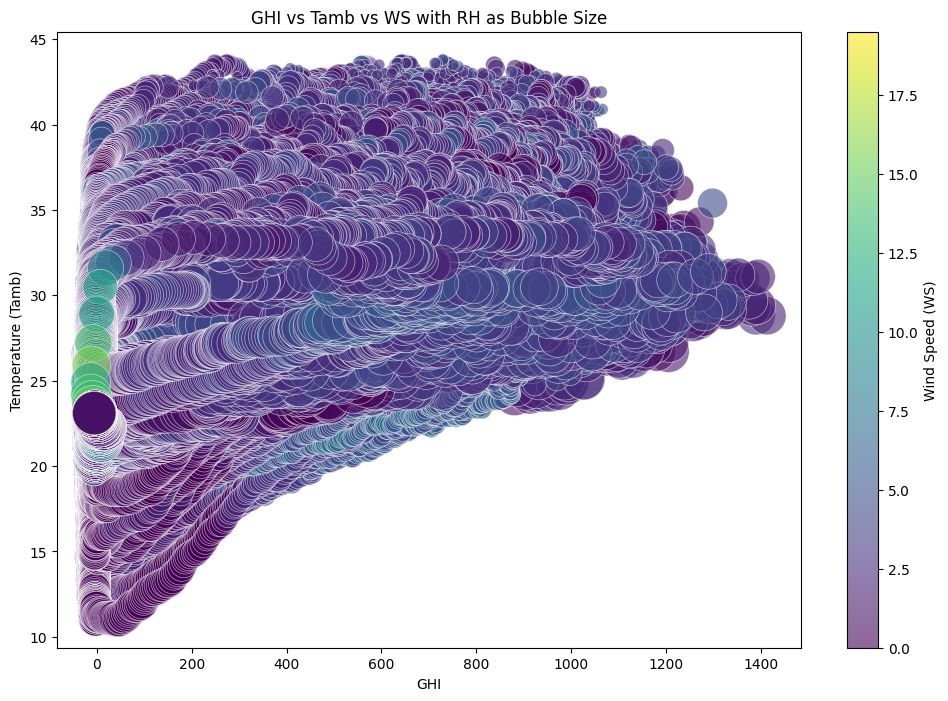

In [20]:
# Bubble chart: GHI vs Tamb vs WS with bubble size representing RH
plt.figure(figsize=(12, 8))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, c=df['WS'], cmap='viridis', alpha=0.6, edgecolor='w', linewidth=0.5)
plt.title('GHI vs Tamb vs WS with RH as Bubble Size')
plt.xlabel('GHI')
plt.ylabel('Temperature (Tamb)')
plt.colorbar(label='Wind Speed (WS)')
plt.show()
